In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Loading and preparing data

Original shape: (500, 500, 3)
Cropped shape: (64, 64, 3)


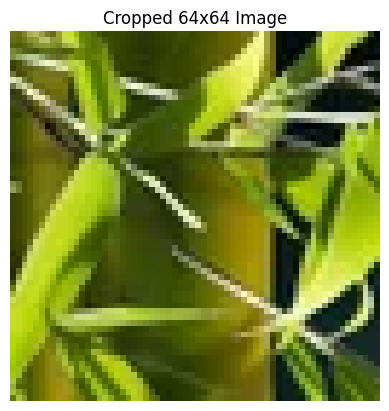

In [2]:
I = mpimg.imread("image.png")
print("Original shape:", I.shape)

# If the image is float [0,1], convert to [0,255]
if I.max() <= 1.0:
    I = (I * 255).astype(np.uint8)

# Crop top-left corner to 64×64×3
I_crop = I[:64, :64, :3]
print("Cropped shape:", I_crop.shape)

plt.imshow(I_crop)
plt.title("Cropped 64x64 Image")
plt.axis("off")
plt.show()


### Indexing & transformations

Center pixel (R,G,B): [162 173 108]


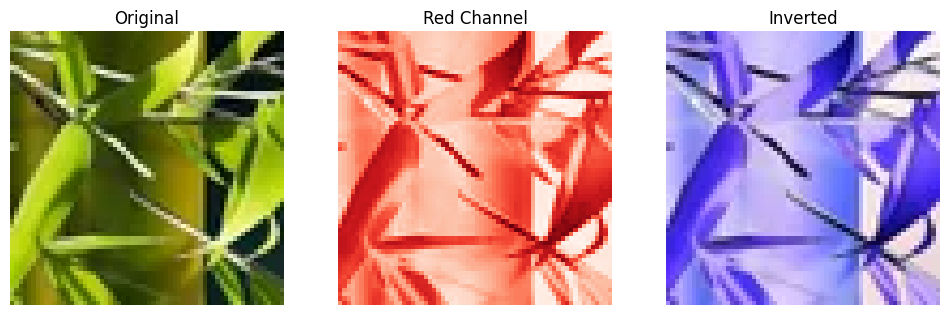

In [3]:
# Pixel at the center
center_pixel = I_crop[32, 32, :]
print("Center pixel (R,G,B):", center_pixel)

# Red channel
R = I_crop[:, :, 0]

# Invert image
I_inv = 255 - I_crop

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(I_crop); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(R, cmap="Reds"); plt.title("Red Channel"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(I_inv); plt.title("Inverted"); plt.axis("off")
plt.show()

### Grayscale conversion

Average brightness: 0.42085350126378673


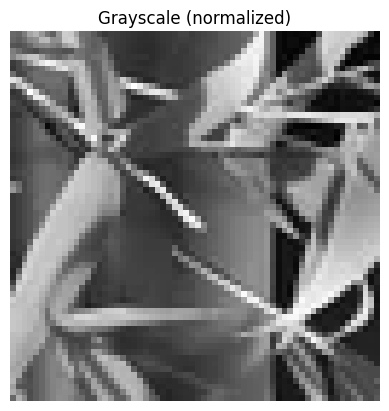

In [4]:
Gray = 0.299*I_crop[:, :, 0] + 0.587*I_crop[:, :, 1] + 0.114*I_crop[:, :, 2]
Gray_norm = Gray / 255.0

avg_brightness = Gray_norm.mean()
print("Average brightness:", avg_brightness)

plt.imshow(Gray_norm, cmap="gray")
plt.title("Grayscale (normalized)")
plt.axis("off")
plt.show()


### Augmentations

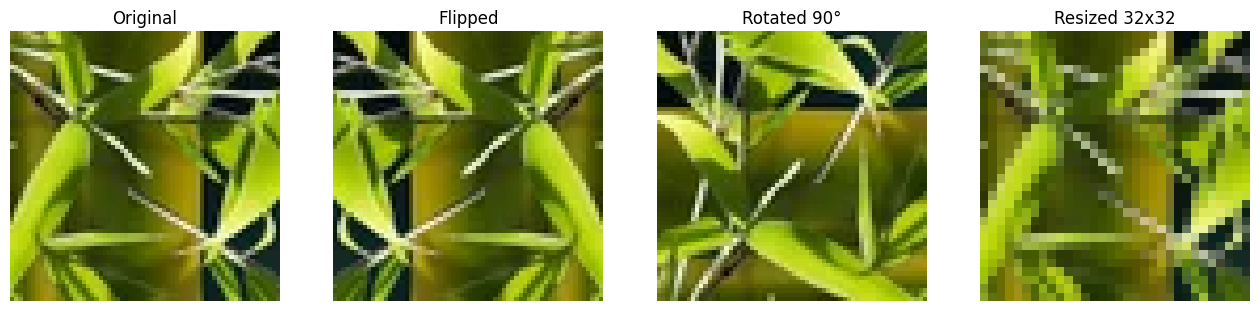

In [5]:
I_flip = np.fliplr(I_crop) # Flip horizontally
I_rot = np.rot90(I_crop) # Rotate 90 degree
I_small = I_crop \
            .reshape(32, 2, 32, 2, 3) \
            .mean(axis=(1,3)) # Resize (32x32x3) by averaging 2x2 blocks

plt.figure(figsize=(16,4))
plt.subplot(1,4,1); plt.imshow(I_crop); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(I_flip); plt.title("Flipped"); plt.axis("off")
plt.subplot(1,4,3); plt.imshow(I_rot); plt.title("Rotated 90°"); plt.axis("off")
plt.subplot(1,4,4); plt.imshow(I_small.astype(np.uint8)); plt.title("Resized 32x32"); plt.axis("off")
plt.show()
